# <font color=blue>Assignment</font>

- In this assignment, you are going to use your model to predict survival of the Titanic disaster. For this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.
    - Download [Titanic](https://www.kaggle.com/c/titanic/data) data from Kaggle. The data in the train.csv file meets your need.
    - Split your data into training and test sets.
    - Predict the survival based on the test data you split by creating your model.
    - Is your model's performance satisfactory? Explain.
    - Try to improve your model's performance by adding or subtracting some variables. <br>

- Explore the advantages and disadvantages of Logistic Regression and discuss with your mentor.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

#### Filling the missing values 

In [3]:
titanic=pd.read_csv('train.csv')

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.isnull().sum()/titanic.shape[0]*100

In [5]:
np.where(titanic.Embarked.isnull())
titanic.iloc[[61, 829],:]
titanic.Embarked.value_counts()
titanic.Embarked.fillna('S',inplace=True)

In [6]:
titanic.Age.interpolate(method='pad',limit_direction='both',inplace=True)

In [7]:
titanic.Cabin.interpolate(method='pad',limit_direction='both',inplace=True)

In [8]:
titanic[titanic.Name.str.contains('Braund')]
titanic.iloc[0,10] = 'A14'

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  is_male      891 non-null    uint8  
 13  Embarked_ID  891 non-null    int64  
 14  Cabin_ID     891 non-null    int64  
 15  Ticket_ID    891 non-null    int64  
dtypes: float64(2), int64(8), object(5), uint8(1)
memory usage: 105.4+ KB


In [9]:
titanic['is_male']=pd.get_dummies(data=titanic.Sex,drop_first=True)

In [10]:
le=LabelEncoder()
titanic['Embarked_ID']=le.fit_transform(titanic.Embarked)

In [11]:
le_1=LabelEncoder()
titanic['Cabin_ID']=le_1.fit_transform(titanic.Cabin)

In [13]:
le_2=LabelEncoder()
titanic['Ticket_ID']=le_2.fit_transform(titanic.Ticket)

After preparation of the dataset, I am going to apply the logistic regression

In [26]:
#Target Feature is `Survived column. Since this is categorical variable, I can apply logistic regression.
Y= titanic['Survived']

#Independent Variables without dytpe object
X=titanic.loc[:,titanic.describe(exclude='O').columns].drop(columns='Survived')

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=10000)

In [35]:
# The target variable takes 2 values, 0 or 1, which is binary Logistic Regression. I am going to basically use of One vs. Rest algortihm.
log_reg=LogisticRegression(solver='lbfgs', multi_class="ovr")

In [ ]:
log_reg.fit(X_train,Y_train)

In [53]:
train_accuracy = log_reg.score(X_train, Y_train)
test_accuracy = log_reg.score(X_test, Y_test)

print('One-vs.-Rest', '-'*30, 
      'Accuracy on Train Data : {:.2f}'.format(train_accuracy), 
      'Accuracy on Test Data  : {:.2f}'.format(test_accuracy), sep='\n')

One-vs.-Rest
------------------------------
Accuracy on Train Data : 0.78
Accuracy on Test Data  : 0.75


In [ ]:
Y_predictions=log_reg.predict(X_test)
Y_predictions

In [ ]:
C_values = [0.001,0.01, 0.1,1,10,100, 1000,10000,100000]

accuracy_values = pd.DataFrame(columns=['C_values', 'Train Accuracy', 'Test Accuracy'])

for c in C_values:
    # Apply logistic regression model to training data
    log_reg_2 = LogisticRegression(penalty = 'l2', C = c, random_state = 1000, solver='lbfgs', multi_class='ovr')
    log_reg_2.fit(X_train, Y_train)
    accuracy_values = accuracy_values.append({'C_values': c,
                                              'Train Accuracy': log_reg_2.score(X_train, Y_train),
                                              'Test Accuracy': log_reg_2.score(X_test, Y_test)
                                             }, ignore_index=True)
display(accuracy_values)   

In the light of the above, I see  Performance Boots of the model.

Since first model by default c set to 1. The train result is 78% and test is about 75%.

When I set the c values, after the performance Tuning, to 10000, The accuray of train become even 78.5%, the test result's performance increase from 75%  to about 80%.


__!! If I consider the problem in this specific case, the model cannot make the right prediction about 20%. Since wrong prediction causes to death of someone in this case, the model should give more predictable results than the models so far.__

In [71]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,is_male,Embarked_ID,Cabin_ID,Ticket_ID
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,A14,S,1,2,1,523
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,81,596
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S,0,2,81,669
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,55,49
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S,1,2,55,472


In [64]:
titanic[titanic.Survived==0].groupby('Pclass').Survived.count()/titanic.groupby('Pclass').Survived.count()

Pclass
1    0.370370
2    0.527174
3    0.757637
Name: Survived, dtype: float64

In [75]:
titanic[titanic.Survived==0].groupby(by=['Pclass','Sex']).Survived.count()/titanic.groupby(by=['Pclass','Sex']).Survived.count()

Pclass  Sex   
1       female    0.031915
        male      0.631148
2       female    0.078947
        male      0.842593
3       female    0.500000
        male      0.864553
Name: Survived, dtype: float64

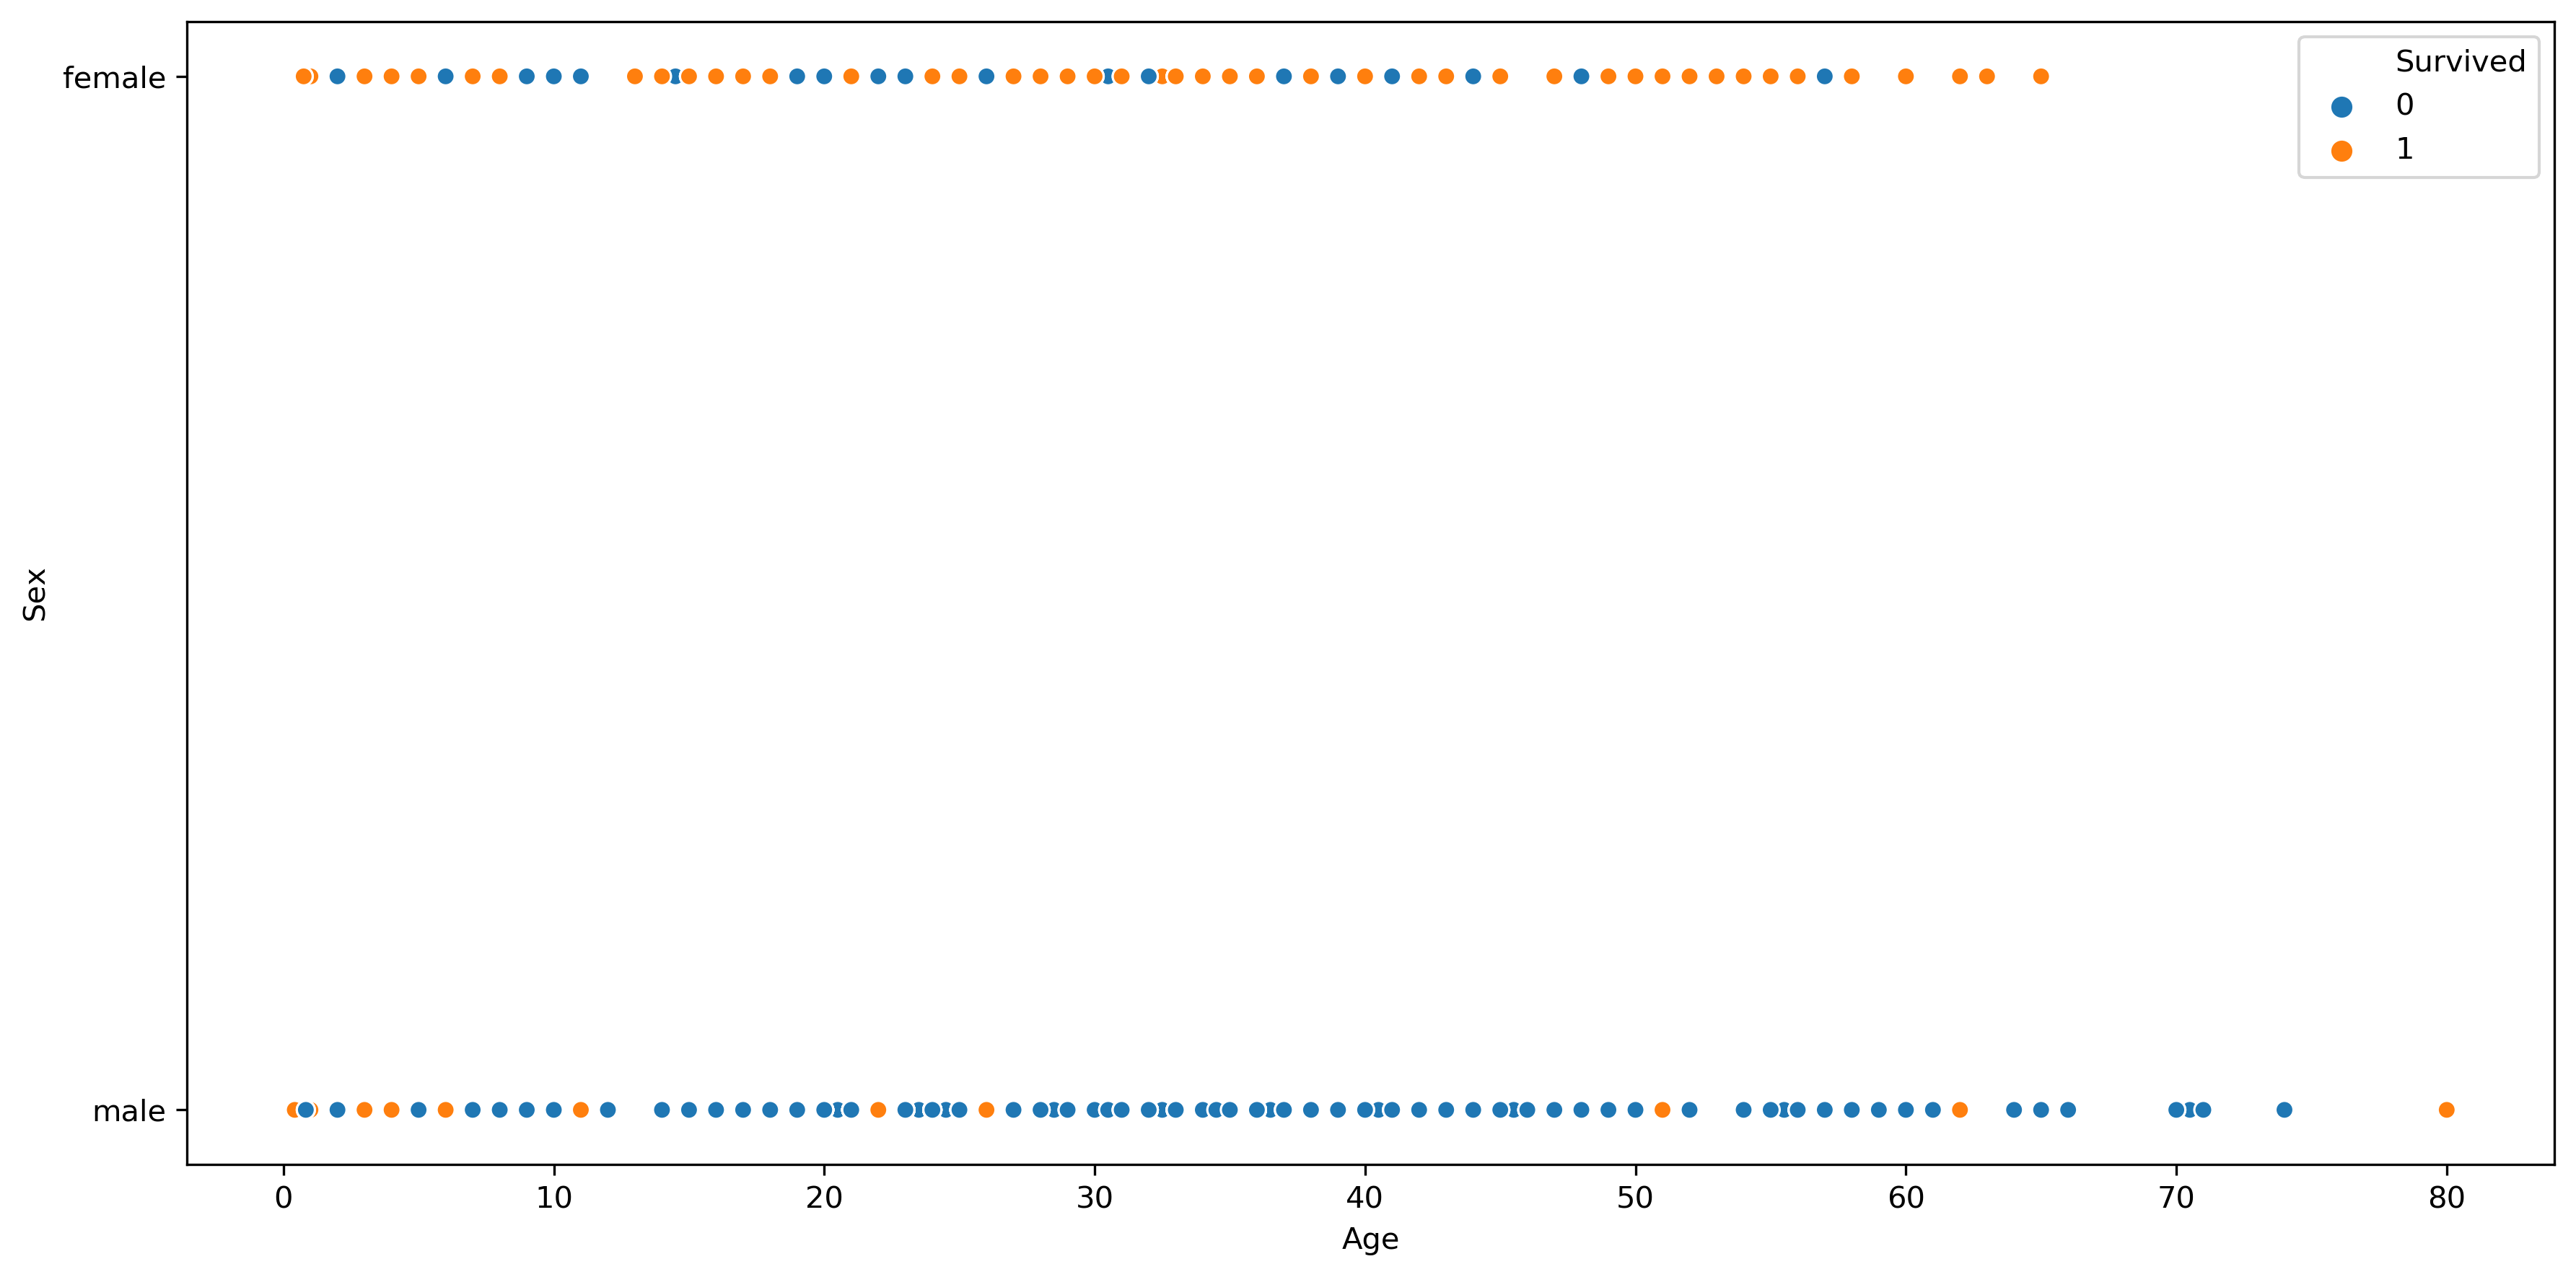

In [82]:
plt.figure(figsize=(12,6),dpi=300)
sns.scatterplot(x='Age',y='Sex',data=titanic,hue='Survived')
plt.tight_layout()
plt.show()

In [87]:
titanic[(titanic.Sex=='male')&(titanic.Survived==0)].shape[0]/titanic[titanic.Survived==0].shape[0]

0.8524590163934426

* After my reviewing the dataset, I could not find out any new beneficial variable to boost the test performance score.

In [89]:
titanic.to_csv('titanic.csv')